In [1]:
%matplotlib inline
from matplotlib.pyplot import *
from numpy import *
from functools import lru_cache

In [2]:
def pade(z, zs, us):

    @lru_cache(maxsize=1024)
    def g(p, n):
        if p==0: return us[n]
        return (g(p-1, p-1) - g(p-1, n))/((zs[n]-zs[p-1])*g(p-1, n))
     
    #g.cache_clear()
        
    An1 = 0.0
    An  = g(0, 0)
    Bn1 = 1.0
    Bn  = 1.0
    
    for n,zn in enumerate(zs[:-1]):    
        a = g(n+1,n+1)
        An1, An = An, An + (z-zn)*a*An1
        Bn1, Bn = Bn, Bn + (z-zn)*a*Bn1
        
    print(g.cache_info())
        
    return An/Bn

CacheInfo(hits=380, misses=210, maxsize=1024, currsize=210)
CacheInfo(hits=380, misses=210, maxsize=1024, currsize=210)
CacheInfo(hits=380, misses=210, maxsize=1024, currsize=210)
CacheInfo(hits=380, misses=210, maxsize=1024, currsize=210)
CacheInfo(hits=380, misses=210, maxsize=1024, currsize=210)
CacheInfo(hits=380, misses=210, maxsize=1024, currsize=210)
CacheInfo(hits=380, misses=210, maxsize=1024, currsize=210)
CacheInfo(hits=380, misses=210, maxsize=1024, currsize=210)
CacheInfo(hits=380, misses=210, maxsize=1024, currsize=210)
CacheInfo(hits=380, misses=210, maxsize=1024, currsize=210)
CacheInfo(hits=380, misses=210, maxsize=1024, currsize=210)
CacheInfo(hits=380, misses=210, maxsize=1024, currsize=210)
CacheInfo(hits=380, misses=210, maxsize=1024, currsize=210)
CacheInfo(hits=380, misses=210, maxsize=1024, currsize=210)
CacheInfo(hits=380, misses=210, maxsize=1024, currsize=210)
CacheInfo(hits=380, misses=210, maxsize=1024, currsize=210)
CacheInfo(hits=380, misses=210, maxsize=

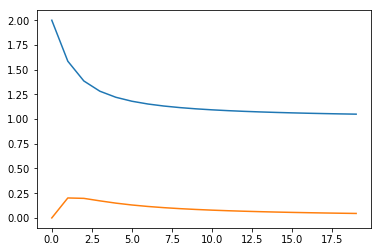

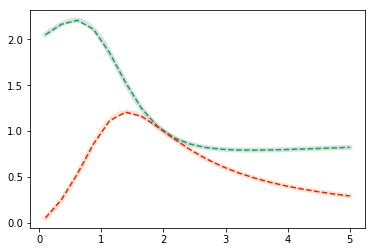

In [3]:
def f(z): return 1.0/(z-1.0+1.0j)*(z-2.0+2.0j)

xs = linspace(0.1, 5, 100)

#zs = linspace(0, 20, 20)*1j
zs = linspace(0, 20, 20)*1j
us = f(zs)

figure()
plot(real(us))
plot(imag(us))

ys = []
xs2 = linspace(0.1, 5, 20)
for x in xs2:
    ys.append(pade(x, zs, us))
    
figure()

plot(xs, real(f(xs)), lw=5, alpha=0.2)
plot(xs, imag(f(xs)), lw=5, alpha=0.2)

plot(xs2, real(ys), '--')
plot(xs2, imag(ys), '--')